<a href="https://colab.research.google.com/github/SoumyaCO/Handwritten-Digit-recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

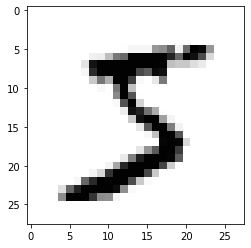

In [6]:
np.set_printoptions(linewidth = 400)
print(y_train[0])
print(x_train[0])

plt.imshow(x_train[0], cmap = 'Greys')

In [7]:
x_train[0].shape

(28, 28)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'softmax')
])

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('loss') < 0.3:
      print(f"\n Loss is below 0.3: {logs.get('loss')* 100:.2f}%")
      self.model.stop_training = True

In [12]:
callback = CallBack()
model.fit(x_train, y_train, epochs = 5, callbacks = [callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4028 - accuracy: 0.8562
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3850 - accuracy: 0.9096
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2737 - accuracy: 0.9309
 Loss is below 0.3: 27.37%
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.9309


In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"\n Accuracy:{accuracy * 100:.2f}%")
print(f"\n Loss:{loss * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2998 - accuracy: 0.9294

 Accuracy:92.94%

 Loss:29.98%


Also we can normalize the pixel values of the images to fed the data to the neural network